# Project Planning Individual Stage

In [4]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## 1. Data Description

### players.csv

This data shows the identities of players and their experiences and behaviours in the game. The data has a total of **196 observations** and **7 variables**.
The variables are as listed below:

| **Variable**     | **Type** | **Description**                     | **Notes** |
|------------------|----------|--------------------------------------|-----------|
| `experience`     | chr      | Players gaming experience level (Beginner, Amateur, Regular, Veteran, Pro) | Might be subjectively classified. |
| `subscribe` | lgl | Whether each player subscribed (TRUE) to a game-related newsletter or not (FALSE)  | Can be used as a target variable for prediction |
| `hashedEmail` | chr | Player ID | 196 different IDs. Can act as an identification for each player |
| `played_hours` | dbl | Number of hours played by each player | Might be right-skewed with some invalid data |
| `name` | chr | The name of each player | 196 different names. Can act as the same function as `hashedEmail` | 
| `gender` | chr | The gender of each player | Mostly male/female. Some group of gender might be  |
| `Age` | dbl | The age of each player | Have two missing values. Can be used as a predictor. |

### Potential Data Issues

- Two missing values in `Age` can lead to error in data processing
- The number in `played_hours` is might be right-skewed (many low-hour players, few high-hour players)
- Some values in the `played_hours` column is 0.0, which means the player played for 0.0 hours, and can be invalid.
- `gender` column is dominated by `Male` and `Female`. Therefore, other assigned genders might be underrepresented in the data processing.
- The values in the `experience` column might be subjective since there is not formal definition of each gaming experiences.

### Likely Data Collection Method

- `subscribe` data is collected from the in-app subscription data.
- `experience`, `name`, `gender`, and `Age` data is likely to be user-input data.
- `played_hours` likely comes from platform usage logs.

## 2. Question

Broad Question: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question:
Can the player's age and game experience predict if a player is subscribed to a game-related newsletter or not in `players.csv`

## 3. Exploratory Data Analysis and Visualization

In [5]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [9]:
head(players)

nrow(players)
ncol(players)

glimpse(players)

summary(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [10]:
players_mean <- players|>
                select(played_hours, Age) |>
                map_df(mean, na.rm=TRUE)|>
                rename_with(~ c("played_hours_mean", "age_mean"))

players_mean

played_hours_mean,age_mean
<dbl>,<dbl>
5.845918,21.13918


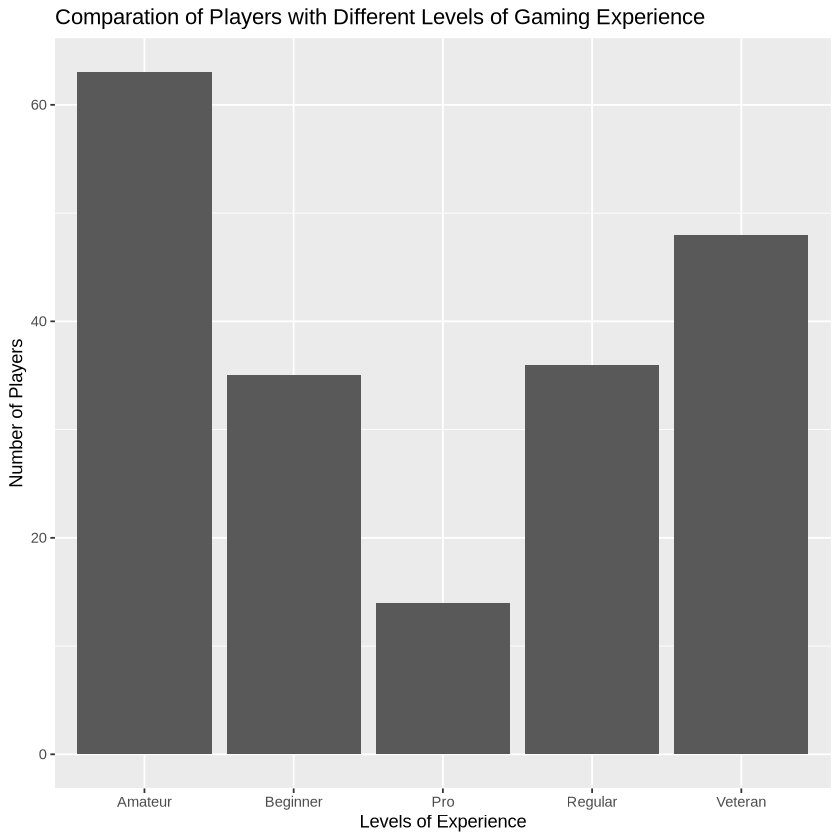

In [20]:
exp_count <- players |>
   group_by(experience) |>
   summarize(count = n()) 

experience_hist <- ggplot(exp_count, aes(x=experience, y=count)) +
            geom_bar(stat="identity")+
            labs(x= "Levels of Experience", y= "Number of Players")+
            ggtitle("Comparation of Players with Different Levels of Gaming Experience")
experience_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


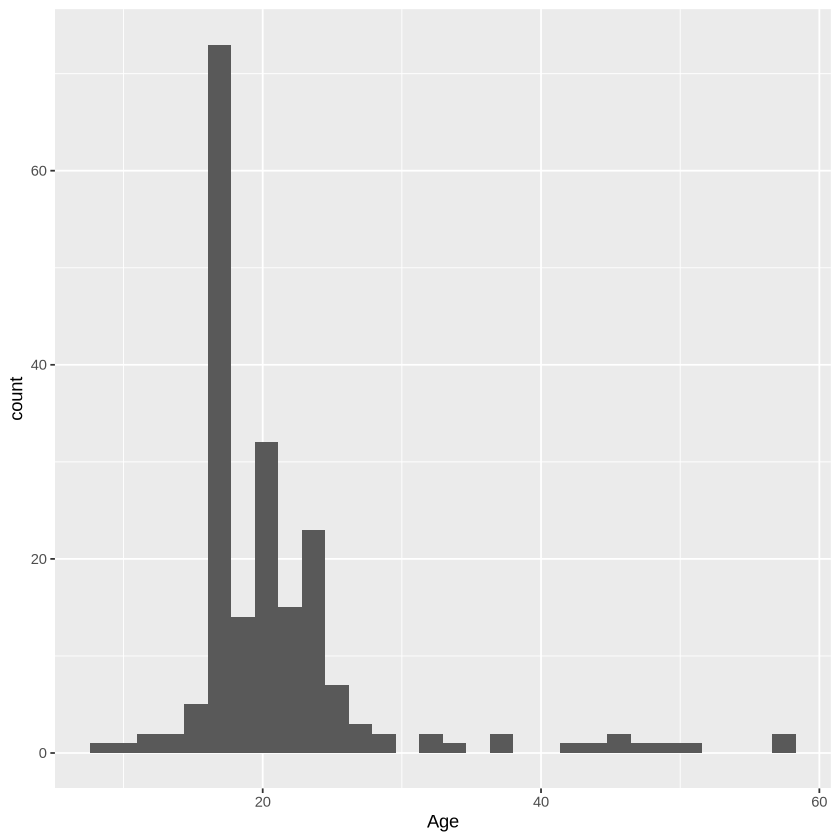

In [21]:
age_hist <- players |>
            ggplot(aes(x=Age))+
            geom_histogram()

age_hist